#### Created By : Sai Madhav Tikkani
#### Dated : 1st March 2021
#### Objective : 
    1. To identify whether transaction-receipt matching vector was able to correctly predit the transaction
    2. Create a best ML model  which can be used to order a set of transactions by likelihood of matching a receipt image 
   
#### Methodology :
    1. Looking for Missing Values
    2. Looking for Outliers
    3. Create target variable for the model
    4. One hot encoding
    5. Balance Imbalance Class and treatment
    6. Trying out a Linear model in Logistic Regression
    7. Trying out a decision tree model in Random Forest
    8. Trying out a Non Linear model in XG Boost
    9. Parameter tuning
    10. Variable Importance
#### Suggesting Next Steps : As all ideas can't be tried in limited time
#### Suggesting Required : Suggesting what would be deployment strategy for the model


In [1]:
### Import all the required packages to be used for furthar analysis
import pandas as pd
import os
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
### Change the locations for current working directory
os.getcwd()

'C:\\Users\\hp'

In [3]:
### Read the file required
trans = pd.read_csv('C:\\Users\\hp\\Desktop\\Madhav\\Tide_test_DS\\Tide_test_DS\\data_interview_test_v2.csv',delimiter=':')

In [4]:
trans

,receipt_id,company_id,matched_transaction_id,feature_transaction_id,DateMappingMatch,AmountMappingMatch,DescriptionMatch,DifferentPredictedTime,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch
0,10000,10000,10468,10000,0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,10000,10000,10468,10001,0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,10000,10000,10468,10003,0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,10000,10000,10468,10004,0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,10000,10000,10468,10005,0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12029,50226,50000,50368,50074,0.65,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12030,50226,50000,50368,50075,0.65,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12031,50226,50000,50368,50366,0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
12032,50226,50000,50368,50367,0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [5]:
### Print the statistics about the data read
print ("The shape of data is as follows :", trans.shape)

The shape of data is as follows : (12034, 14)


### 1. Looking for Missing values

In [6]:
print ("Give the information on the data required :",trans.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12034 entries, 0 to 12033
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   receipt_id               12034 non-null  int64  
 1   company_id               12034 non-null  int64  
 2   matched_transaction_id   12034 non-null  int64  
 3   feature_transaction_id   12034 non-null  int64  
 4   DateMappingMatch         12034 non-null  float64
 5   AmountMappingMatch       12034 non-null  float64
 6   DescriptionMatch         12034 non-null  float64
 7   DifferentPredictedTime   12034 non-null  float64
 8   TimeMappingMatch         12034 non-null  float64
 9   PredictedNameMatch       12034 non-null  float64
 10  ShortNameMatch           12034 non-null  float64
 11  DifferentPredictedDate   12034 non-null  float64
 12  PredictedAmountMatch     12034 non-null  float64
 13  PredictedTimeCloseMatch  12034 non-null  float64
dtypes: float64(10), int64(

#### No Missing values found : Missing value Treatment not required

### 2. Looking for Outliers

In [7]:
print ("Describe the data :", trans.describe())

Describe the data :          receipt_id    company_id  matched_transaction_id  \
count  12034.000000  12034.000000            12034.000000   
mean   27396.264168  27247.797906            27773.908177   
std    12037.596520  12024.542988            12014.611971   
min    10000.000000  10000.000000            10112.000000   
25%    20057.000000  20000.000000            20259.000000   
50%    30105.000000  30000.000000            30524.000000   
75%    30343.000000  30000.000000            31318.000000   
max    50226.000000  50000.000000            50408.000000   

       feature_transaction_id  DateMappingMatch  AmountMappingMatch  \
count            12034.000000      12034.000000        12034.000000   
mean             27547.608941          0.217901            0.031660   
std              12037.734072          0.384535            0.122611   
min              10000.000000          0.000000            0.000000   
25%              20010.000000          0.000000            0.000000   
50% 

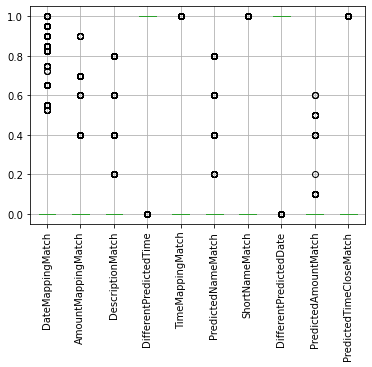

In [8]:
boxplot = trans.boxplot(column=['DateMappingMatch', 'AmountMappingMatch', 'DescriptionMatch',
       'DifferentPredictedTime', 'TimeMappingMatch', 'PredictedNameMatch',
       'ShortNameMatch', 'DifferentPredictedDate', 'PredictedAmountMatch',
       'PredictedTimeCloseMatch'], rot=90)

#### No Outliers found : Outlier Treatment not required

### 3. Create target variable for the model

#### Target definition: If the  matched transaction id is equal to feature transaction id then 1 else 0

In [9]:
trans['target'] = trans.apply(lambda x: 1 if (x.matched_transaction_id==x.feature_transaction_id)  else 0,axis=1)
target = trans["target"].value_counts()
target

0    11177
1      857
Name: target, dtype: int64

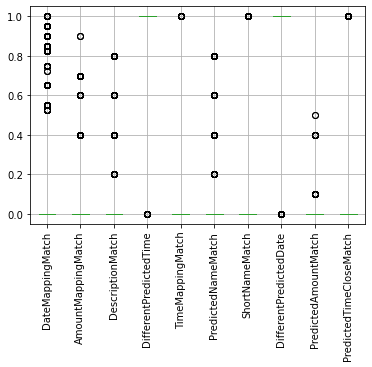

In [10]:
boxplot = trans[trans['target'] == 0].boxplot(column=['DateMappingMatch', 'AmountMappingMatch', 'DescriptionMatch',
       'DifferentPredictedTime', 'TimeMappingMatch', 'PredictedNameMatch',
       'ShortNameMatch', 'DifferentPredictedDate', 'PredictedAmountMatch',
       'PredictedTimeCloseMatch'], rot=90)

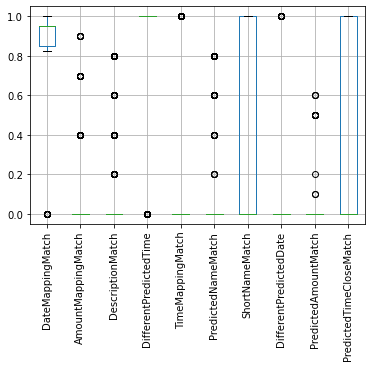

In [11]:
boxplot = trans[trans['target'] == 1].boxplot(column=['DateMappingMatch', 'AmountMappingMatch', 'DescriptionMatch',
       'DifferentPredictedTime', 'TimeMappingMatch', 'PredictedNameMatch',
       'ShortNameMatch', 'DifferentPredictedDate', 'PredictedAmountMatch',
       'PredictedTimeCloseMatch'], rot=90)

#### If we compare the box plot for data where target = 0 and where target = 1 , we find that there is a huge difference in values of the feature DifferentPredictDate. 

#### If  DifferentPredictDate is 0 then it is most likely the target is 0 ( in correct match) . This might come out as an important variable for model

In [12]:
####  delete unnecessary columns

trans.drop(['receipt_id','company_id','matched_transaction_id','feature_transaction_id'],inplace=True,axis=1)
trans.head()

,DateMappingMatch,AmountMappingMatch,DescriptionMatch,DifferentPredictedTime,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch,target
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


### 4. One hot encoding



### No need to convert the categorical variable to one hot dummy encoding as it only has 1,0 as values

### Validation base: Keeping 20% of the data aside for validation

In [13]:
from sklearn.model_selection import train_test_split

model_data, val_data = train_test_split(trans, test_size=0.2)

In [14]:
model_data.shape

(9627, 11)

In [15]:
val_data.shape

(2407, 11)

In [16]:
model_data["target"].value_counts()

0    8934
1     693
Name: target, dtype: int64

In [17]:
Y_val = val_data['target']
val_data.drop(['target'],inplace=True,axis=1)
val_data.head()

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,DateMappingMatch,AmountMappingMatch,DescriptionMatch,DifferentPredictedTime,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch
7646,0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8701,0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
10830,0.95,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9807,0.95,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3508,0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


### 5. Balance Imbalance Class

### This is a case of imbalance classification problem. 

#### The target here is 0 and 1 hence it is a classification problem

#### An imbalanced classification problem is an example of a classification problem where the distribution of target is biased or skewed. 
#### Here the target has 7.1% amd 82.9% distribution

#### There are various methods to tackle this . I chose Oversampling than undersampling as the number of data points available are less

#### Random oversampling involves randomly duplicating examples from the minority class and adding them to the training dataset.

In [18]:
model_majority = model_data[model_data['target']==0.0]
print(model_majority.shape)

model_minority = model_data[model_data['target']!=0.0]
print(model_minority.shape)

(8934, 11)
(693, 11)


In [20]:

from sklearn.utils import resample
# Oversample minority class
model_minority_oversampled = resample(model_minority, 
                                 replace=True,   
                                 n_samples=693*5,     # to get 30% minority class
                                 random_state=123) # reproducible results
 
# # Combine majority class with oversampled minority class
model_oversampled = pd.concat([model_minority_oversampled, model_majority])
 
model_oversampled.target.value_counts()

0    8934
1    3465
Name: target, dtype: int64

In [21]:
target = model_oversampled['target']
model_oversampled.drop(['target'],inplace=True,axis=1)
model_oversampled.head()

,DateMappingMatch,AmountMappingMatch,DescriptionMatch,DifferentPredictedTime,TimeMappingMatch,PredictedNameMatch,ShortNameMatch,DifferentPredictedDate,PredictedAmountMatch,PredictedTimeCloseMatch
7589,0.850,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9296,0.950,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3622,0.950,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10905,0.950,0.0,0.8,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7946,0.825,0.0,0.8,1.0,0.0,0.8,0.0,0.0,0.0,0.0


### Test Train Split

####  70:30 split is preferable in most cases, but due to less datapointd in  training set I am are using 80:20

In [22]:
from sklearn.model_selection import train_test_split
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(model_oversampled, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 0,stratify = target)

# Show the results of the split
print ("Training set has  samples", X_train.shape[0])
print ("Testing set has  samples  ",X_test.shape[0])

Training set has  samples 9919
Testing set has  samples   2480


### 6. Trying out a Linear model in Logistic Regression

In [23]:

from sklearn import linear_model

clf_A =  linear_model.LogisticRegressionCV(solver='lbfgs',random_state=40)
learner_A = clf_A.fit(X_train, y_train)

#### Making the prediction on test data

In [24]:

ypred = learner_A.predict(X_test,)

print(ypred)

#### Round off values i.e. 1 for values greater than 0.5 probability
predictions = [round(value) for value in ypred]

#### precison & Recall

from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

[1 0 0 ... 0 1 0]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1787
           1       0.74      0.86      0.80       693

    accuracy                           0.88      2480
   macro avg       0.84      0.87      0.86      2480
weighted avg       0.89      0.88      0.88      2480



#### Make the prediction on validation data

In [25]:

ypred_val = learner_A.predict(val_data,)

print(ypred_val)

#### Round off values i.e. 1 for values greater than 0.5 probability
predictions_val = [round(value) for value in ypred_val]

#### precison & Recall

from sklearn.metrics import classification_report

print(classification_report(Y_val, predictions_val))

[0 0 1 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      2243
           1       0.37      0.86      0.52       164

    accuracy                           0.89      2407
   macro avg       0.68      0.88      0.73      2407
weighted avg       0.95      0.89      0.91      2407



### 7. Trying out a Decision Tree model in Random Forest

In [26]:

from sklearn.ensemble import RandomForestClassifier

clf_B =  RandomForestClassifier(random_state=40)
learner_B = clf_B.fit(X_train, y_train)

#### Making the prediction on test data

In [27]:

ypred_rf = learner_B.predict(X_test,)

print(ypred_rf)

#### Round off values i.e. 1 for values greater than 0.5 probability
predictions_ref = [round(value) for value in ypred_rf]

#### precison & Recall

from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_ref))

[1 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1787
           1       0.87      0.70      0.77       693

    accuracy                           0.89      2480
   macro avg       0.88      0.83      0.85      2480
weighted avg       0.88      0.89      0.88      2480



#### Make the prediction on validation data

In [28]:

ypred_rf_val = learner_B.predict(val_data,)

print(ypred_rf_val)

#### Round off values i.e. 1 for values greater than 0.5 probability
predictions_rf_val = [round(value) for value in ypred_rf_val]

#### precison & Recall

from sklearn.metrics import classification_report

print(classification_report(Y_val, predictions_rf_val))

[0 0 1 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2243
           1       0.53      0.69      0.60       164

    accuracy                           0.94      2407
   macro avg       0.75      0.82      0.78      2407
weighted avg       0.95      0.94      0.94      2407



#### We are doing better than Logistic model , lets try a boosting model

### 8. Trying out a Boosted Decision Tree model in XG Boost

In [29]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost.sklearn import XGBClassifier

clf_c = XGBClassifier(eval_metric='logloss',random_state = 40)
learner_C=clf_c.fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [30]:
# import xgboost as xgb
# from xgboost import XGBClassifier
# from xgboost.sklearn import XGBClassifier

# clf_c = XGBClassifier(base_score = 0.5,booster = 'gbtree',colsample_bylevel=1,colsample_bytree=0.5,gamma=0,
#                       learning_rate=0.05,max_delta_step = 0 ,max_depth = 5, min_child_weight=5,missing = None,n_estimators = 200,
#                       n_jobs = -1,nthread = None,objective = 'binary:logistic',eval_metric='logloss',
#                       random_state = 0,reg_alpha=1,reg_lambda = 1,scale_pos_weight =1,seed=None,subsample = 1)
# learner_C=clf_c.fit(X_train, y_train)

#### Making the prediction on test data

In [31]:

ypred_xgb = learner_C.predict(X_test,)

print(ypred_xgb)

#### Round off values i.e. 1 for values greater than 0.5 probability
predictions_xgb = [round(value) for value in ypred_xgb]

#### precison & Recall

print(classification_report(y_test, predictions_xgb))

[1 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1787
           1       0.86      0.70      0.77       693

    accuracy                           0.89      2480
   macro avg       0.88      0.83      0.85      2480
weighted avg       0.88      0.89      0.88      2480



#### Make the prediction on validation data

In [32]:

ypred_xgb_val = learner_C.predict(val_data,)

print(ypred_xgb_val)

#### Round off values i.e. 1 for values greater than 0.5 probability
predictions_xgb_val = [round(value) for value in ypred_xgb_val]

#### precison & Recall

print(classification_report(Y_val, predictions_xgb_val))

[0 0 1 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2243
           1       0.53      0.70      0.60       164

    accuracy                           0.94      2407
   macro avg       0.75      0.82      0.78      2407
weighted avg       0.95      0.94      0.94      2407



#### We are doing better than both Logistic and Random forest model, lets fine tune

### 9. Parameter tuning



In [33]:
params = {'n_estimators' : [100,150,200,250,300], # Number of trees in xg boost
         'min_child_weight' : [1,3,5,7],
         'reg_alpha' : [0,0.05,0.1,0.5,1],
         'subsample' : [0.9,0.8,0.7],
         'colsample_bytree' : [0.6,0.7,0.8],
         'max_depth' : [3,4,5,6], # Maximum number of levels in tree
         'learning_rate' : [0.05,0.1,0.5,1]} 

ind_params = {'base_score' : 0.5,'booster' : 'gbtree','colsample_bylevel': 1,'gamma' : 0,
                     'max_delta_step' : 0 ,'n_jobs' : -1,'objective' : 'binary:logistic','eval_metric' : 'logloss',
                      'random_state' : 40,'reg_lambda' : 1,'scale_pos_weight' : 1,'seed' : 9873}



#### Params are the featured which are being tuned.
#### ind_params are the features which aren't being tuned

In [34]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.model_selection import RandomizedSearchCV
xgb =  XGBClassifier(**ind_params)
# Random search of parameters, using 2 fold cross validation, 
# search across 150 different combinations
xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = params, n_iter = 150, cv = 2, verbose=2)
# Fit the random search model
xgb_random.fit(X_train, y_train)
print (xgb_random.best_params_)


Fitting 2 folds for each of 150 candidates, totalling 300 fits
[CV] subsample=0.8, reg_alpha=0.05, n_estimators=200, min_child_weight=5, max_depth=6, learning_rate=0.05, colsample_bytree=0.7 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\hp\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  subsample=0.8, reg_alpha=0.05, n_estimators=200, min_child_weight=5, max_depth=6, learning_rate=0.05, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.8, reg_alpha=0.05, n_estimators=200, min_child_weight=5, max_depth=6, learning_rate=0.05, colsample_bytree=0.7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  subsample=0.8, reg_alpha=0.05, n_estimators=200, min_child_weight=5, max_depth=6, learning_rate=0.05, colsample_bytree=0.7, total=   0.4s
[CV] subsample=0.7, reg_alpha=0.5, n_estimators=300, min_child_weight=3, max_depth=4, learning_rate=0.5, colsample_bytree=0.6 
[CV]  subsample=0.7, reg_alpha=0.5, n_estimators=300, min_child_weight=3, max_depth=4, learning_rate=0.5, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.7, reg_alpha=0.5, n_estimators=300, min_child_weight=3, max_depth=4, learning_rate=0.5, colsample_bytree=0.6 
[CV]  subsample=0.7, reg_alpha=0.5, n_estimators=300, min_child_weight=3, max_depth=4, learning_rate=0.5, colsample_bytree=0.6, total=   0.5s
[CV] subsample=0.7, reg_alpha=0.05, n_estimators=150, min_child_weight=1, max_depth=5, learning_rate=1, colsample_bytree=0.6 
[CV]  subsample=0.7, reg_alpha=0.05, n_estimators=150, min_child_weight=1, max_depth=5, learning_rate=1, colsample_bytree=0.6, total=   0.3s
[CV] subsample=0.7, reg_alpha=0.05, n_estimators=15

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  2.6min finished


{'subsample': 0.8, 'reg_alpha': 0.5, 'n_estimators': 250, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.6}


#### Making the prediction on test data

In [35]:
# Make predictions using the unoptimized and model
best_random = xgb_random.best_estimator_

# predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_random.predict(X_test)

print(classification_report(y_test, best_predictions))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1787
           1       0.86      0.70      0.77       693

    accuracy                           0.89      2480
   macro avg       0.88      0.83      0.85      2480
weighted avg       0.88      0.89      0.88      2480



#### Make the prediction on validation data

In [36]:

ypred_best_val = best_random.predict(val_data,)

print(ypred_best_val)

#### Round off values i.e. 1 for values greater than 0.5 probability
predictions_best_val = [round(value) for value in ypred_best_val]

#### precison & Recall

print(classification_report(Y_val, predictions_best_val))

[0 0 1 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2243
           1       0.53      0.70      0.60       164

    accuracy                           0.94      2407
   macro avg       0.75      0.82      0.78      2407
weighted avg       0.95      0.94      0.94      2407



 ### 10.Variable importance

In [37]:
best_random.feature_importances_

array([0.08696388, 0.00852986, 0.0277946 , 0.01239224, 0.05524933,
       0.01393454, 0.03978851, 0.7359058 , 0.00945359, 0.00998751],
      dtype=float32)

In [38]:
var_imp = pd.DataFrame({'importance_in_model' : best_random.feature_importances_,'variable_name' : X_train.columns})
var_imp = var_imp.sort_values(['importance_in_model'],ascending = False).reset_index(drop = True)
print(var_imp)

   importance_in_model            variable_name
0             0.735906   DifferentPredictedDate
1             0.086964         DateMappingMatch
2             0.055249         TimeMappingMatch
3             0.039789           ShortNameMatch
4             0.027795         DescriptionMatch
5             0.013935       PredictedNameMatch
6             0.012392   DifferentPredictedTime
7             0.009988  PredictedTimeCloseMatch
8             0.009454     PredictedAmountMatch
9             0.008530       AmountMappingMatch


<BarContainer object of 10 artists>

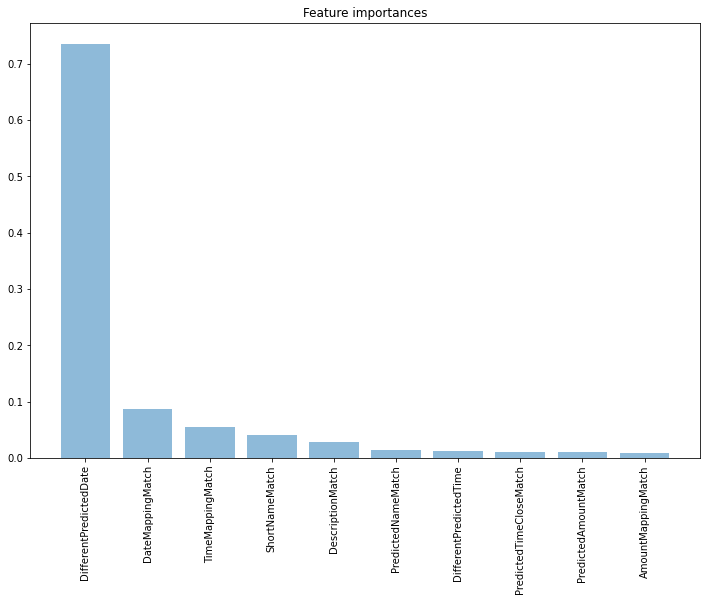

In [39]:
# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.xticks(rotation='vertical')
plt.bar(var_imp['variable_name'].values, var_imp['importance_in_model'].values, align='center', alpha=0.5)


#### As predicted before DifferentPredictedTime came out to be the best feature

### Next Steps on improving the model

1. Require more data points for better training of the model
2. Try More Sampling Technique like SMOTE
3. Try Random over sampling by playing around with minority percentage between (20%-35%)
4. Try More advanced Boosting techniques like XGBoost with class weights 
5. Improve by tuning more parameters on different set of values

### Deployment Tips:
1. Save the best model (best_random) as pickle file
2. Automate the  process and just predict
